# Solving Ackley function using GA

### Ackley Function

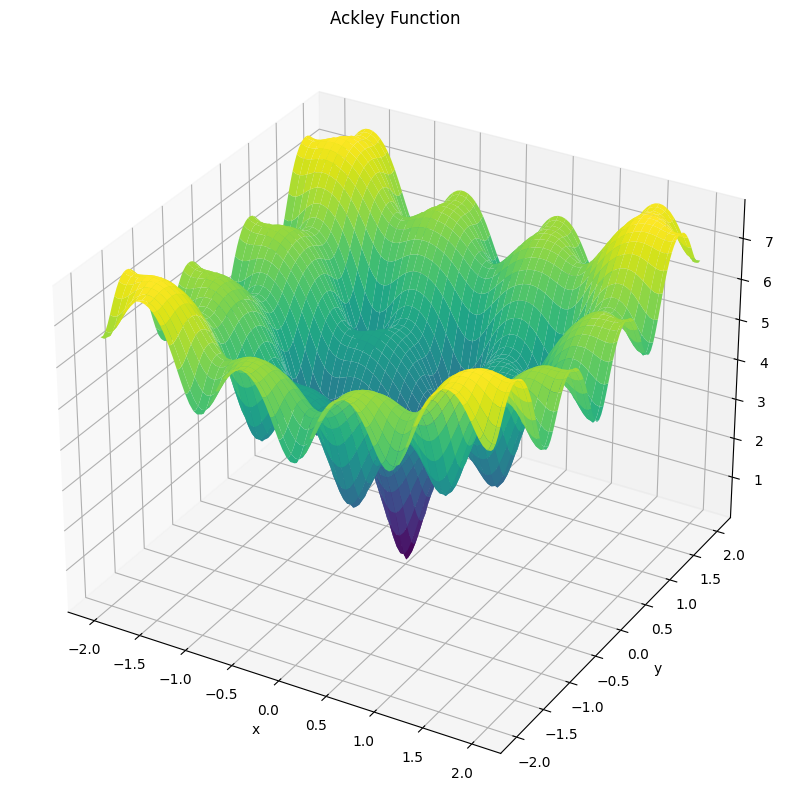

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Ackley function
def ackley(x, y):
    a = 20
    b = 0.2
    c = 2 * np.pi
    term1 = -a * np.exp(-b * np.sqrt(0.5 * (x**2 + y**2)))
    term2 = -np.exp(0.5 * (np.cos(c*x) + np.cos(c*y)))
    return term1 + term2 + a + np.exp(1)

# Create a meshgrid for the x and y values
X = np.linspace(-2, 2, 100)
Y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(X, Y)

# Evaluate the Ackley function for each (x,y) pair
Z = ackley(X, Y)

# Create a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Ackley Function')
plt.show()
# plt.savefig('CH07_F18_Ackley.png', dpi=300)

### Import and plot using pymoo

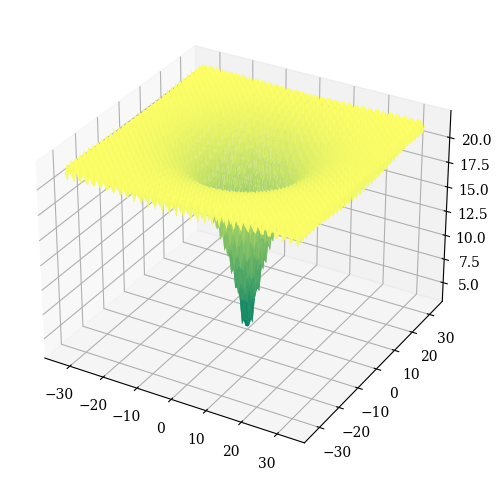

In [1]:
import numpy as np
from pymoo.problems import get_problem
from pymoo.visualization.fitness_landscape import FitnessLandscape

# create a Ackley test problem
problem = get_problem("ackley", n_var=2, a=20, b=1/5, c=2 * np.pi)

# plot the fitness landscape
FitnessLandscape(problem, angle=(45, 45), _type="surface").show()

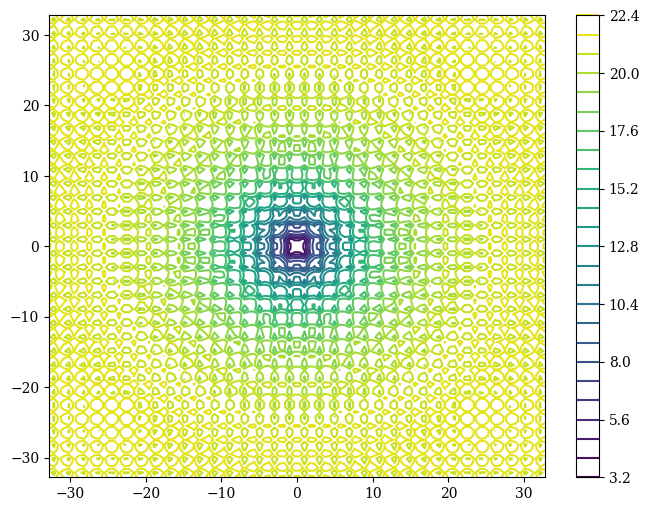

In [2]:
# plot the fitness contour
FitnessLandscape(problem, _type="contour", colorbar=True).show()

### Define the parameters

In [3]:
import random
import math

# Define constants for the genetic algorithm
POPULATION_SIZE = 100
GENOME_LENGTH = 30
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.8
GENERATIONS = 100

# Define constants for the Ackley function
a = 20
b = 0.2
c = 2 * math.pi

### Define the decode function to convert binary genome to real values

In [4]:
def decode(genome):
    x = []
    for i in range(0, GENOME_LENGTH, 5):
        binary_string = "".join([str(bit) for bit in genome[i:i+5]])
        x.append(int(binary_string, 2) / 31 * 32 - 16)
    return x

### Define the fitness function (Ackley function)

In [5]:
def fitness(genome):
    x = decode(genome)
    term1 = -a * math.exp(-b * math.sqrt(sum([(xi ** 2) for xi in x]) / len(x)))
    term2 = -math.exp(sum([math.cos(c * xi) for xi in x]) / len(x))
    return term1 + term2 + a + math.exp(1)

### Define the crossover function

In [6]:
def crossover(parent1, parent2):
    child1 = []
    child2 = []
    for i in range(GENOME_LENGTH):
        if random.random() < CROSSOVER_RATE:
            child1.append(parent2[i])
            child2.append(parent1[i])
        else:
            child1.append(parent1[i])
            child2.append(parent2[i])
    return child1, child2

### Define the mutation function

In [7]:
def mutate(genome):
    for i in range(GENOME_LENGTH):
        if random.random() < MUTATION_RATE:
            genome[i] = 1 - genome[i]

### Create the initial population

In [8]:
population = [[random.randint(0, 1) for _ in range(GENOME_LENGTH)] for _ in range(POPULATION_SIZE)]

### Run the genetic algorithm

In [9]:
for generation in range(GENERATIONS):
    # Evaluate the fitness of each genome
    fitness_scores = [(genome, fitness(genome)) for genome in population]
    fitness_scores.sort(key=lambda x: x[1])
    
    # Print the best genome and its fitness
    print(f"Generation {generation}: Best fitness = {fitness_scores[0][1]}")
    
    # Select the parents for the next generation
    parents = [fitness_scores[i][0] for i in range(POPULATION_SIZE // 2)]
    
    # Create the next generation
    next_generation = []
    for i in range(POPULATION_SIZE // 2):
        parent1 = random.choice(parents)
        parent2 = random.choice(parents)
        child1, child2 = crossover(parent1, parent2)
        mutate(child1)
        mutate(child2)
        next_generation.append(child1)
        next_generation.append(child2)
    
    # Replace the current population with the next generation
    population = next_generation

Generation 0: Best fitness = 15.409134560198176
Generation 1: Best fitness = 15.584284588119424
Generation 2: Best fitness = 15.284331045386647
Generation 3: Best fitness = 14.736018413073543
Generation 4: Best fitness = 13.070221630316897
Generation 5: Best fitness = 12.638087764087093
Generation 6: Best fitness = 12.988791691689269
Generation 7: Best fitness = 10.6782904772016
Generation 8: Best fitness = 12.44763857777781
Generation 9: Best fitness = 11.23439380693123
Generation 10: Best fitness = 12.543294167931375
Generation 11: Best fitness = 10.822477845556861
Generation 12: Best fitness = 11.105885185705862
Generation 13: Best fitness = 12.905660984915919
Generation 14: Best fitness = 13.141043702603728
Generation 15: Best fitness = 11.604890048037797
Generation 16: Best fitness = 14.864192996101806
Generation 17: Best fitness = 10.523525981991915
Generation 18: Best fitness = 13.985655315724198
Generation 19: Best fitness = 12.979157783801684
Generation 20: Best fitness = 12.2

### Print the best genome and its fitness

In [10]:
fitness_scores = [(genome, fitness(genome)) for genome in population]
fitness_scores.sort(key=lambda x: x[1])
print(f"Generation {GENERATIONS}: Best fitness = {fitness_scores[0][1]}")

Generation 100: Best fitness = 13.373493355952109


### print the best genome

In [11]:
print(f"Best genome = {fitness_scores[0][0]}")

Best genome = [1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0]


### Decode the best genome

In [12]:
print(f"Best genome decoded = {decode(fitness_scores[0][0])}")

Best genome decoded = [4.64516129032258, -2.580645161290322, 1.5483870967741922, 1.5483870967741922, 4.64516129032258, 6.70967741935484]


### Print decision variables in real values

In [13]:
print(f"Decision variables in real values = {decode(fitness_scores[0][0])}")

Decision variables in real values = [4.64516129032258, -2.580645161290322, 1.5483870967741922, 1.5483870967741922, 4.64516129032258, 6.70967741935484]


## Solving Ackly function using Pymooo

In [14]:
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.problems import get_problem
from pymoo.optimize import minimize

problem = get_problem("ackley", n_var=6) 

algorithm = GA(
    pop_size=100,
    eliminate_duplicates=True)

res = minimize(problem,
               algorithm,
               seed=1,
               verbose=False)

print("Best solution found: \nX = %s\nF = %s" % (res.X, res.F))

Best solution found: 
X = [ 0.00145857 -0.00011553  0.00033902 -0.00169267 -0.0005825  -0.00547546]
F = [0.01003609]
